In [135]:
import re
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [136]:
data = pd.read_csv('invest_data.csv', header=1, 
                   usecols=range(1,9),
                   names=['id', 'date', 'beg_day_estimate', 
                          'out_user', 'in_user', 'in_inc', 'out_int',
                          'end_day_estimate'])
data['month'] = data['date'].apply(lambda x: dt.datetime.strptime(x, '%d.%m.%Y').month)
data['dt_date'] = data['date'].apply(lambda x: dt.datetime.strptime(x, '%d.%m.%Y'))
data['b_num'] = data['id'].apply(lambda x: re.findall(r'(?:_)(\d+)', x)[0] if re.findall(r'(?:_)(\d+)', x) else x)
data['d_num'] = data['dt_date'].apply(lambda x: x.day)
data['delta'] = data['in_user'] - data['out_user']
data['weekday'] = data['dt_date'].apply(lambda x: x.weekday())
data_check = data.loc[(data['month']==12) & (data['id'].str.startswith('Б'))]
data = data.loc[data['month']!=12]


In [137]:
data.head(10)

,id,date,beg_day_estimate,out_user,in_user,in_inc,out_int,end_day_estimate,month,dt_date,b_num,d_num,delta,weekday
0,Банкомат_1,01.01.2018,3960000,166600,65000,0,0,3858400,1,2018-01-01,1,1,-101600,0
1,Банкомат_1,02.01.2018,3858400,146600,25000,0,0,3736800,1,2018-01-02,1,2,-121600,1
2,Банкомат_1,03.01.2018,3736800,141900,72000,0,0,3666900,1,2018-01-03,1,3,-69900,2
3,Банкомат_1,04.01.2018,3666900,110800,56000,0,0,3612100,1,2018-01-04,1,4,-54800,3
4,Банкомат_1,05.01.2018,3612100,83100,74000,0,0,3603000,1,2018-01-05,1,5,-9100,4
5,Банкомат_1,06.01.2018,3603000,100800,84000,0,0,3586200,1,2018-01-06,1,6,-16800,5
6,Банкомат_1,07.01.2018,3586200,93300,71000,0,0,3563900,1,2018-01-07,1,7,-22300,6
7,Банкомат_1,08.01.2018,3563900,108800,90000,0,0,3545100,1,2018-01-08,1,8,-18800,0
8,Банкомат_1,09.01.2018,3545100,166300,77000,0,0,3455800,1,2018-01-09,1,9,-89300,1
9,Банкомат_1,10.01.2018,3455800,191800,27000,0,0,3291000,1,2018-01-10,1,10,-164800,2


In [138]:
def get_bank_data(bank_n):
    return data.loc[data.id==f'Банкомат_{bank_n}']

## ATM day start estimate

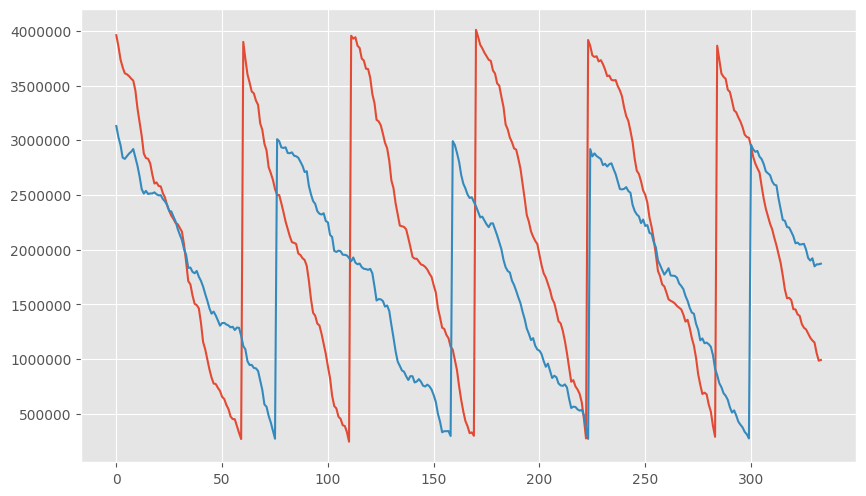

In [139]:

figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
data_b1 = get_bank_data(1)
for i in range(1,3):
    plt.plot(range(365-31), get_bank_data(i)['beg_day_estimate'])

In [140]:
def get_week_delta(atm_num):
    data_b = get_bank_data(atm_num)
    
    delta_b_week = []
    for day_n in range(7):
        correct_days = data_b.loc[data_b['weekday'] == day_n]
        delta_b_week.append(correct_days['delta'].mean())
    return delta_b_week

def get_month_delta(atm_num):
    data_b = get_bank_data(atm_num)
    delta_b_month = []
    for day_n in range(1,32):
        correct_days = data_b.loc[data_b['d_num'] == day_n]
        delta_b_month.append(correct_days['delta'].mean())
    return delta_b_month

## Delta per month for ine ATM

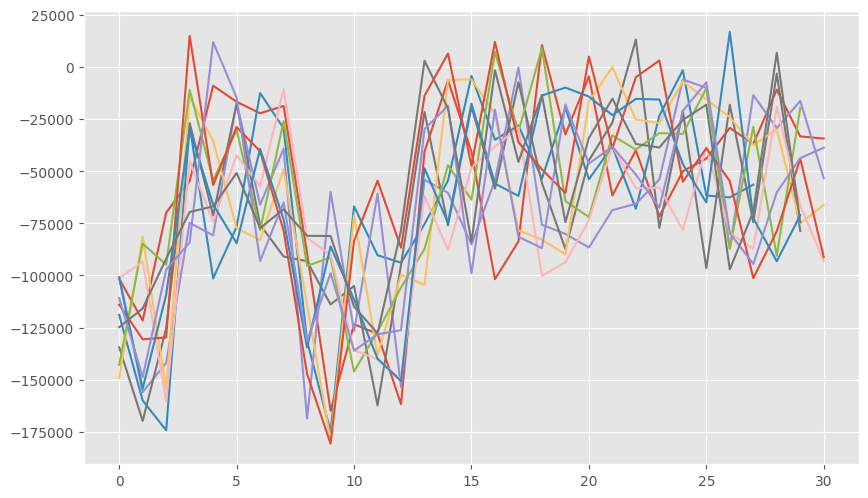

In [141]:
data_1 = get_bank_data(1)
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
for month in range(1,12):
    correct_days = data_1.loc[data_1['month'] == month]
    plt.plot(range(len(correct_days['delta'])), correct_days['delta'])
plt.grid(1)

## Mean deltas per ATM *(weekday and month)*

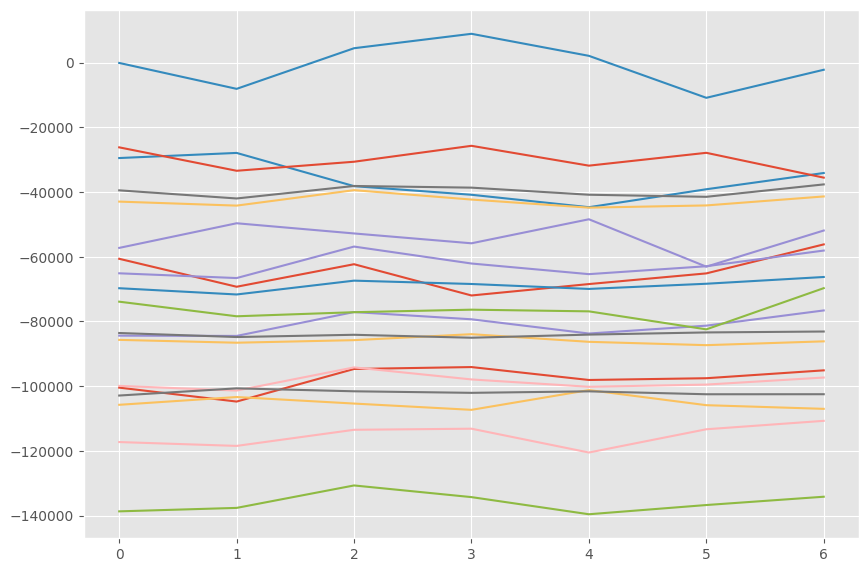

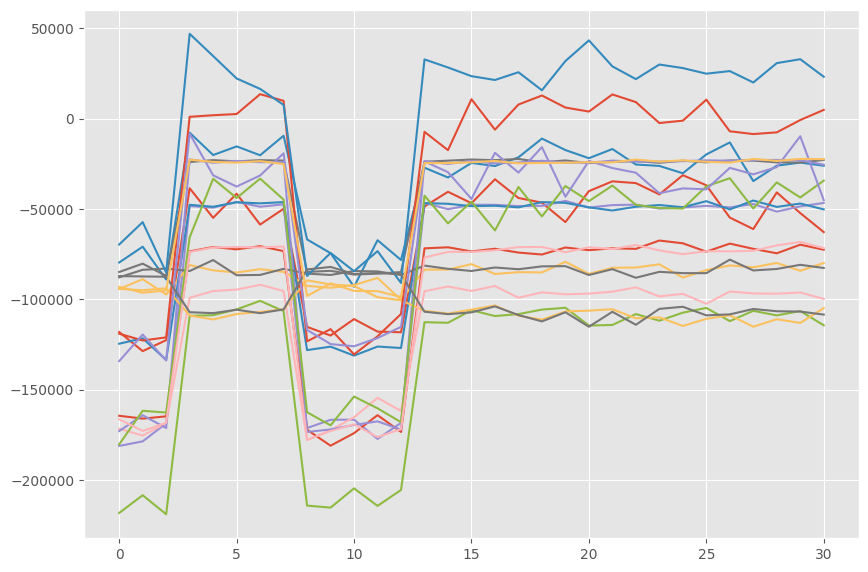

In [142]:
figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')
for atm_n in range(1, 20):
    d = get_week_delta(atm_n)
    plt.plot(range(7),d)
plt.grid(1)

figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')
for atm_n in range(1, 20):
    d = get_month_delta(atm_n)
    plt.plot(d)
plt.grid(1)
    

## Delta prediction

In [143]:
def predict(atm_n, date):
    dotw = date.weekday()
    dotm = date.day
    avg_dotw = get_week_delta(atm_n)[dotw]
    avg_dotm = get_month_delta(atm_n)[dotm-1]
    return 0.7*avg_dotm + 0.3*avg_dotw

In [144]:
data_check['prediction'] = data_check.apply(lambda row: predict(row['b_num'], row['dt_date']), axis=1)

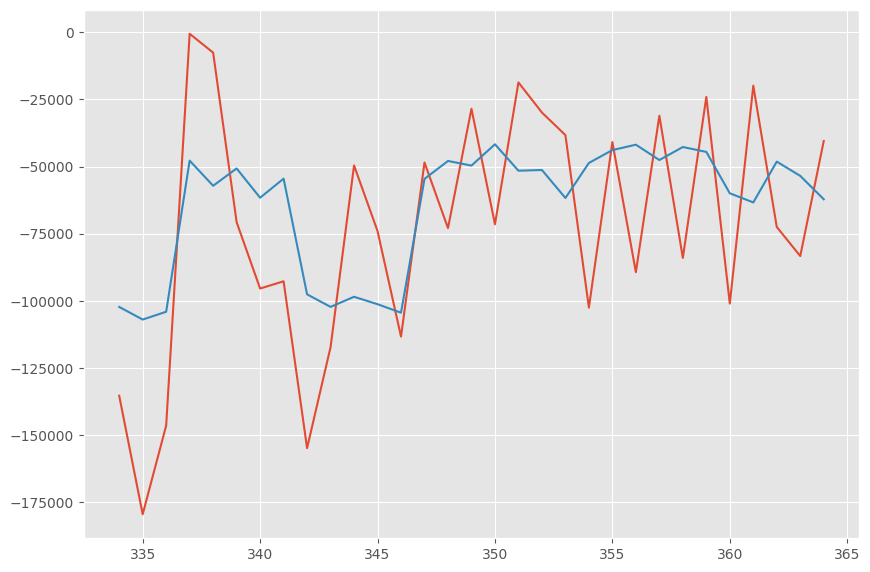

In [145]:
figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')
plt.plot(get_data_check_n(1)['delta'])
plt.plot(get_data_check_n(1)['prediction']) 
plt.grid(1)